In [0]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.appName("SentimentAnalysis").getOrCreate()

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Read JSON file from GCS bucket
gcs_path = "gs://sentiment_analysis_data/part-06.json"

# column pruning optimization: related to predicate pushdown.
customSchema = StructType([
    StructField("rating", StringType(), True),
    StructField("review_detail", StringType(), True)
])

options = {
    "header": "true",
    "schema": customSchema,
    "multiLine": "true",
    "path": gcs_path
}

data_df = spark.read.format("json").options(**options).load()
display(data_df.limit(10))

helpful movie rating review_date review_detail review_id review_summary reviewer spoiler_tag List(8, 21) Le Samouraï (1967) 9 26 November 2000 Surely one of the suavest movies ever made. Crime doesn't come more laid back and sophisticated than this. The hat, the coat, the Cirtoen DS, the lack of dialogue, the swinging doors in the police interrogation scene, the organ music in the night club... Damn!!!!!!One of THE best movies of all time. Ever. rw0099142 Cooler Than Cool ed.wenn 0 List(219, 284) Le Samouraï (1967) 10 7 December 2000 To see how beautiful, moving, exciting and astonishing Melville's 'Le Samourai' is, to recognise it as one of the greatest films ever made, arguably the most perfect, it is necessary to forget everything you've been told about it. If you've been told nothing, than you are very lucky; the first time I saw I knew nothing either, and it was a revelation - I came out of the cinema with huge goggle eyes - cinema can do THAT?! I absorbed every Melville film I could find (they are VERY hard to get), and read every article or book about him. My love grew to uncontrollable passion. But a lot cliches and received truths have grown up around his work, and this sublime miracle especially.The most obvious is the director's obsession with American cinema. That his films are mere tributes to American cinema, or stern deconstructions of them. It is true that Jef Costello wears the classic film noir garb of mac and derby, but so do at least 400 men in Paris. And it is true that Melville rigorously exposes the myth of the gangster, but, most importantly, of masculinity and its power. Elaborate theories of psychoanalysis are usually brought in here, the idea that Jef begins the film 'whole', looking at the mirror; during the course of the narrative he loses this self-sufficient image, cracking up as it fragments, split by mirrors, trapped behind bars (although the halved banknotes he consciously plays with at the beginning might qualify this).Others comment on the film less as a gangster film than a dramatisation of particular philosophies. Some see Jef as an example of existentialist man, a man who does not exist except through his acts - the film patiently records endless scenes of Jef walking, staring, preparing for his jobs etc. His final ritual is a preparation for his death; as existentialism suggests, friends, social purpose etc. fall away, and one is left alone with one's fate. Or as an expression of fatalistic Orientalist ethics (the film IS called 'Le Samourai') concerning solitude and the inevitability of death. Melville himself offered two possible interpretations - as a study in schizophrenia, and as an allegory of Man (Jef) pursued by Destiny (the Inspector) into the arms of Death (Valerie, the pianist).All of these, of course, are valid interpretations. I am more sympathetic to those who see 'Samourai' as a dream, a study in solitude, or a portrait of mental breakdown. The film's action takes place largely at night; there is a frequently oneiric tone to Melville's style, the endless walking, the silence, the deliberate paring down of the mise-en-scene to near-monochrome. Jef's impassivity is comparable to that of a somnambulist, walking mechanically down countless corridors. As in a dream, whole sequences are repeated in exactly the same way. We keep returning to the same few locales. The film opens with Jef lying smoking in bed, in the dark; one powerful scene is Jef waking up after he has bandaged his wounded arm - has he had a nightmare, or is it the sound of a passing truck?'Samourai' is also much more moving as a story of solitude than Antonioni's entire oeuvre put together. The only sure thing in this strange and enigmatic film is Jef's loneliness, living with his only friend, a caged bullfinch (usually a symbol of female entrapment) in a dismally run-down, sparse grey bedsit, prey to any intruders. Although he is constantly forced into the centre of the city by work and the police, he is safer 

In [0]:
data_df = data_df.select("rating", "review_detail").cache()
display(data_df.limit(10))

rating review_detail 9 Surely one of the suavest movies ever made. Crime doesn't come more laid back and sophisticated than this. The hat, the coat, the Cirtoen DS, the lack of dialogue, the swinging doors in the police interrogation scene, the organ music in the night club... Damn!!!!!!One of THE best movies of all time. Ever. 10 To see how beautiful, moving, exciting and astonishing Melville's 'Le Samourai' is, to recognise it as one of the greatest films ever made, arguably the most perfect, it is necessary to forget everything you've been told about it. If you've been told nothing, than you are very lucky; the first time I saw I knew nothing either, and it was a revelation - I came out of the cinema with huge goggle eyes - cinema can do THAT?! I absorbed every Melville film I could find (they are VERY hard to get), and read every article or book about him. My love grew to uncontrollable passion. But a lot cliches and received truths have grown up around his work, and this sublime miracle especially.The most obvious is the director's obsession with American cinema. That his films are mere tributes to American cinema, or stern deconstructions of them. It is true that Jef Costello wears the classic film noir garb of mac and derby, but so do at least 400 men in Paris. And it is true that Melville rigorously exposes the myth of the gangster, but, most importantly, of masculinity and its power. Elaborate theories of psychoanalysis are usually brought in here, the idea that Jef begins the film 'whole', looking at the mirror; during the course of the narrative he loses this self-sufficient image, cracking up as it fragments, split by mirrors, trapped behind bars (although the halved banknotes he consciously plays with at the beginning might qualify this).Others comment on the film less as a gangster film than a dramatisation of particular philosophies. Some see Jef as an example of existentialist man, a man who does not exist except through his acts - the film patiently records endless scenes of Jef walking, staring, preparing for his jobs etc. His final ritual is a preparation for his death; as existentialism suggests, friends, social purpose etc. fall away, and one is left alone with one's fate. Or as an expression of fatalistic Orientalist ethics (the film IS called 'Le Samourai') concerning solitude and the inevitability of death. Melville himself offered two possible interpretations - as a study in schizophrenia, and as an allegory of Man (Jef) pursued by Destiny (the Inspector) into the arms of Death (Valerie, the pianist).All of these, of course, are valid interpretations. I am more sympathetic to those who see 'Samourai' as a dream, a study in solitude, or a portrait of mental breakdown. The film's action takes place largely at night; there is a frequently oneiric tone to Melville's style, the endless walking, the silence, the deliberate paring down of the mise-en-scene to near-monochrome. Jef's impassivity is comparable to that of a somnambulist, walking mechanically down countless corridors. As in a dream, whole sequences are repeated in exactly the same way. We keep returning to the same few locales. The film opens with Jef lying smoking in bed, in the dark; one powerful scene is Jef waking up after he has bandaged his wounded arm - has he had a nightmare, or is it the sound of a passing truck?'Samourai' is also much more moving as a story of solitude than Antonioni's entire oeuvre put together. The only sure thing in this strange and enigmatic film is Jef's loneliness, living with his only friend, a caged bullfinch (usually a symbol of female entrapment) in a dismally run-down, sparse grey bedsit, prey to any intruders. Although he is constantly forced into the centre of the city by work and the police, he is safer on the margins, in anonymous streets, abandoned railway yards, disused buildings. Or at least he was before all the trouble started. He is defined against the grim, geometric anonymity of modern life, his mi

In [0]:
import re
from pyspark.sql.functions import col, lower, regexp_replace, udf
from pyspark.sql.types import DoubleType, StringType
from pyspark.ml.feature import StopWordsRemover, Tokenizer, Bucketizer

In [0]:
# Drop rows with null values
data_df = data_df.dropna()
data_df = data_df.withColumn('rating', col('rating').cast(DoubleType()))

In [0]:
# Define bins and labels for bucketizing the ratings column
bins = [0, 4, 7, 10]
labels = ['negative', 'neutral', 'positive']

# Bucketize the ratings column and add it as a new column 'sentiment'
bucketizer = Bucketizer(splits=bins, inputCol='rating', outputCol='sentiment')
data_df = bucketizer.transform(data_df)



# Rename the 'review_detail' column to 'review'
data_df = data_df.withColumnRenamed('review_detail', 'review')
display(data_df.limit(10))

rating review sentiment 9.0 Surely one of the suavest movies ever made. Crime doesn't come more laid back and sophisticated than this. The hat, the coat, the Cirtoen DS, the lack of dialogue, the swinging doors in the police interrogation scene, the organ music in the night club... Damn!!!!!!One of THE best movies of all time. Ever. 2.0 10.0 To see how beautiful, moving, exciting and astonishing Melville's 'Le Samourai' is, to recognise it as one of the greatest films ever made, arguably the most perfect, it is necessary to forget everything you've been told about it. If you've been told nothing, than you are very lucky; the first time I saw I knew nothing either, and it was a revelation - I came out of the cinema with huge goggle eyes - cinema can do THAT?! I absorbed every Melville film I could find (they are VERY hard to get), and read every article or book about him. My love grew to uncontrollable passion. But a lot cliches and received truths have grown up around his work, and this sublime miracle especially.The most obvious is the director's obsession with American cinema. That his films are mere tributes to American cinema, or stern deconstructions of them. It is true that Jef Costello wears the classic film noir garb of mac and derby, but so do at least 400 men in Paris. And it is true that Melville rigorously exposes the myth of the gangster, but, most importantly, of masculinity and its power. Elaborate theories of psychoanalysis are usually brought in here, the idea that Jef begins the film 'whole', looking at the mirror; during the course of the narrative he loses this self-sufficient image, cracking up as it fragments, split by mirrors, trapped behind bars (although the halved banknotes he consciously plays with at the beginning might qualify this).Others comment on the film less as a gangster film than a dramatisation of particular philosophies. Some see Jef as an example of existentialist man, a man who does not exist except through his acts - the film patiently records endless scenes of Jef walking, staring, preparing for his jobs etc. His final ritual is a preparation for his death; as existentialism suggests, friends, social purpose etc. fall away, and one is left alone with one's fate. Or as an expression of fatalistic Orientalist ethics (the film IS called 'Le Samourai') concerning solitude and the inevitability of death. Melville himself offered two possible interpretations - as a study in schizophrenia, and as an allegory of Man (Jef) pursued by Destiny (the Inspector) into the arms of Death (Valerie, the pianist).All of these, of course, are valid interpretations. I am more sympathetic to those who see 'Samourai' as a dream, a study in solitude, or a portrait of mental breakdown. The film's action takes place largely at night; there is a frequently oneiric tone to Melville's style, the endless walking, the silence, the deliberate paring down of the mise-en-scene to near-monochrome. Jef's impassivity is comparable to that of a somnambulist, walking mechanically down countless corridors. As in a dream, whole sequences are repeated in exactly the same way. We keep returning to the same few locales. The film opens with Jef lying smoking in bed, in the dark; one powerful scene is Jef waking up after he has bandaged his wounded arm - has he had a nightmare, or is it the sound of a passing truck?'Samourai' is also much more moving as a story of solitude than Antonioni's entire oeuvre put together. The only sure thing in this strange and enigmatic film is Jef's loneliness, living with his only friend, a caged bullfinch (usually a symbol of female entrapment) in a dismally run-down, sparse grey bedsit, prey to any intruders. Although he is constantly forced into the centre of the city by work and the police, he is safer on the margins, in anonymous streets, abandoned railway yards, disused buildings. Or at least he was before all the trouble started. He is defined against the grim, geometric anonymity of modern l

In [0]:
display(data_df.limit(10))

rating review sentiment 9.0 Surely one of the suavest movies ever made. Crime doesn't come more laid back and sophisticated than this. The hat, the coat, the Cirtoen DS, the lack of dialogue, the swinging doors in the police interrogation scene, the organ music in the night club... Damn!!!!!!One of THE best movies of all time. Ever. 2.0 10.0 To see how beautiful, moving, exciting and astonishing Melville's 'Le Samourai' is, to recognise it as one of the greatest films ever made, arguably the most perfect, it is necessary to forget everything you've been told about it. If you've been told nothing, than you are very lucky; the first time I saw I knew nothing either, and it was a revelation - I came out of the cinema with huge goggle eyes - cinema can do THAT?! I absorbed every Melville film I could find (they are VERY hard to get), and read every article or book about him. My love grew to uncontrollable passion. But a lot cliches and received truths have grown up around his work, and this sublime miracle especially.The most obvious is the director's obsession with American cinema. That his films are mere tributes to American cinema, or stern deconstructions of them. It is true that Jef Costello wears the classic film noir garb of mac and derby, but so do at least 400 men in Paris. And it is true that Melville rigorously exposes the myth of the gangster, but, most importantly, of masculinity and its power. Elaborate theories of psychoanalysis are usually brought in here, the idea that Jef begins the film 'whole', looking at the mirror; during the course of the narrative he loses this self-sufficient image, cracking up as it fragments, split by mirrors, trapped behind bars (although the halved banknotes he consciously plays with at the beginning might qualify this).Others comment on the film less as a gangster film than a dramatisation of particular philosophies. Some see Jef as an example of existentialist man, a man who does not exist except through his acts - the film patiently records endless scenes of Jef walking, staring, preparing for his jobs etc. His final ritual is a preparation for his death; as existentialism suggests, friends, social purpose etc. fall away, and one is left alone with one's fate. Or as an expression of fatalistic Orientalist ethics (the film IS called 'Le Samourai') concerning solitude and the inevitability of death. Melville himself offered two possible interpretations - as a study in schizophrenia, and as an allegory of Man (Jef) pursued by Destiny (the Inspector) into the arms of Death (Valerie, the pianist).All of these, of course, are valid interpretations. I am more sympathetic to those who see 'Samourai' as a dream, a study in solitude, or a portrait of mental breakdown. The film's action takes place largely at night; there is a frequently oneiric tone to Melville's style, the endless walking, the silence, the deliberate paring down of the mise-en-scene to near-monochrome. Jef's impassivity is comparable to that of a somnambulist, walking mechanically down countless corridors. As in a dream, whole sequences are repeated in exactly the same way. We keep returning to the same few locales. The film opens with Jef lying smoking in bed, in the dark; one powerful scene is Jef waking up after he has bandaged his wounded arm - has he had a nightmare, or is it the sound of a passing truck?'Samourai' is also much more moving as a story of solitude than Antonioni's entire oeuvre put together. The only sure thing in this strange and enigmatic film is Jef's loneliness, living with his only friend, a caged bullfinch (usually a symbol of female entrapment) in a dismally run-down, sparse grey bedsit, prey to any intruders. Although he is constantly forced into the centre of the city by work and the police, he is safer on the margins, in anonymous streets, abandoned railway yards, disused buildings. Or at least he was before all the trouble started. He is defined against the grim, geometric anonymity of modern l

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import re
from pyspark.ml.feature import StopWordsRemover, RegexTokenizer
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the pre-processing function as a UDF
def preprocess_text(text):
    # remove html tags
    text = re.sub('<.*?>', '', text)
    # convert to lowercase
    text = text.lower()
    # remove special characters and digits
    text = re.sub('[^a-zA-Z]+', ' ', text)
    return text

preprocess_udf = udf(preprocess_text, StringType())

# Apply the pre-processing function to the review column
preprocessed_df = data_df.withColumn('review', preprocess_udf('review'))

# Tokenize the preprocessed text
tokenizer = RegexTokenizer(inputCol='review', outputCol='tokens', pattern='\\W')
tokenized_df = tokenizer.transform(preprocessed_df)

# Remove stop words from the tokenized text
remover = StopWordsRemover(inputCol='tokens', outputCol='filtered_tokens')
filtered_df = remover.transform(tokenized_df)

# Join the filtered tokens back into a string
join_udf = udf(lambda tokens: ' '.join(tokens), StringType())
final_df = filtered_df.withColumn('review', join_udf('filtered_tokens'))


In [0]:
display(final_df.limit(10))

rating review sentiment tokens filtered_tokens 9.0 surely one suavest movies ever made crime doesn come laid back sophisticated hat coat cirtoen ds lack dialogue swinging doors police interrogation scene organ music night club damn one best movies time ever 2.0 List(surely, one, of, the, suavest, movies, ever, made, crime, doesn, t, come, more, laid, back, and, sophisticated, than, this, the, hat, the, coat, the, cirtoen, ds, the, lack, of, dialogue, the, swinging, doors, in, the, police, interrogation, scene, the, organ, music, in, the, night, club, damn, one, of, the, best, movies, of, all, time, ever) List(surely, one, suavest, movies, ever, made, crime, doesn, come, laid, back, sophisticated, hat, coat, cirtoen, ds, lack, dialogue, swinging, doors, police, interrogation, scene, organ, music, night, club, damn, one, best, movies, time, ever) 10.0 see beautiful moving exciting astonishing melville le samourai recognise one greatest films ever made arguably perfect necessary forget everything ve told ve told nothing lucky first time saw knew nothing either revelation came cinema huge goggle eyes cinema absorbed every melville film find hard get read every article book love grew uncontrollable passion lot cliches received truths grown around work sublime miracle especially obvious director obsession american cinema films mere tributes american cinema stern deconstructions true jef costello wears classic film noir garb mac derby least men paris true melville rigorously exposes myth gangster importantly masculinity power elaborate theories psychoanalysis usually brought idea jef begins film whole looking mirror course narrative loses self sufficient image cracking fragments split mirrors trapped behind bars although halved banknotes consciously plays beginning might qualify others comment film less gangster film dramatisation particular philosophies see jef example existentialist man man exist except acts film patiently records endless scenes jef walking staring preparing jobs etc final ritual preparation death existentialism suggests friends social purpose etc fall away one left alone one fate expression fatalistic orientalist ethics film called le samourai concerning solitude inevitability death melville offered two possible interpretations study schizophrenia allegory man jef pursued destiny inspector arms death valerie pianist course valid interpretations sympathetic see samourai dream study solitude portrait mental breakdown film action takes place largely night frequently oneiric tone melville style endless walking silence deliberate paring mise en scene near monochrome jef impassivity comparable somnambulist walking mechanically countless corridors dream whole sequences repeated exactly way keep returning locales film opens jef lying smoking bed dark one powerful scene jef waking bandaged wounded arm nightmare sound passing truck samourai also much moving story solitude antonioni entire oeuvre put together sure thing strange enigmatic film jef loneliness living friend caged bullfinch usually symbol female entrapment dismally run sparse grey bedsit prey intruders although constantly forced centre city work police safer margins anonymous streets abandoned railway yards disused buildings least trouble started defined grim geometric anonymity modern life milieu soulless constricting plot moves elevator shafts imprison image man surveillance society innocent man proven guilty every move followed police happy use morality threat many people see melville films sublimated allegories france occupation contact people preparation death sterile self negating existence ascetic monk uniform ritual vestments jef tragically lonely man undoubted two heartbreaking moments cool austere film emotion breaks alain delon astonishing performance beautiful man movies letting slip like stills moving la jetee goes back scene crime looks pianist face brief second seems absolutely distraught helpless child looking mother reassure key film believe jef

In [0]:
pandas_df = final_df.select(['rating', 'review', 'sentiment']).toPandas()

In [0]:
d={0:'Negative',1:'Neutral',2:'Positive'}
pandas_df['sentiment']=pandas_df['sentiment'].map(d)

In [0]:
pandas_df.head()

,rating,review,sentiment
0,9.0,surely one suavest movies ever made crime does...,Positive
1,10.0,see beautiful moving exciting astonishing melv...,Positive
2,7.0,rare film alain delon played together wife nat...,Positive
3,5.0,movie title opening epigraph refer samurai ton...,Neutral
4,8.0,paris jef costello alain delon lonely hit man ...,Positive


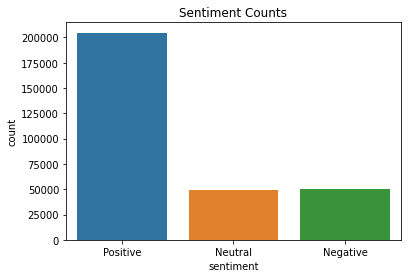

In [0]:
sns.countplot(x='sentiment', data=pandas_df)
plt.title('Sentiment Counts')
plt.show()

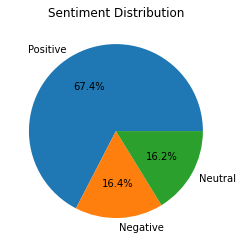

In [0]:
sentiment_counts = pandas_df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

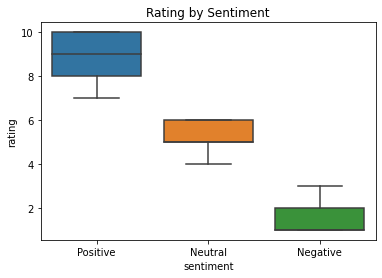

In [0]:
sns.boxplot(x='sentiment', y='rating', data=pandas_df)
plt.title('Rating by Sentiment')
plt.show()

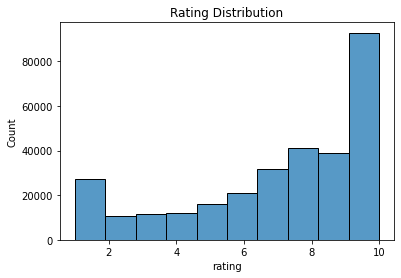

In [0]:
sns.histplot(x='rating', data=pandas_df, bins=10)
plt.title('Rating Distribution')
plt.show()

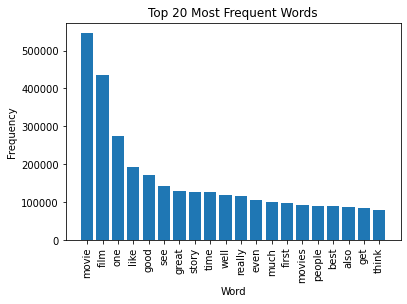

In [0]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each word in the dataset
all_words = []
for review in pandas_df['review']:
    all_words.extend(review.split())
word_freq = Counter(all_words)

# Plot a histogram of the top N most frequent words
N = 20
top_words = word_freq.most_common(N)
top_word_counts = [count for word, count in top_words]
top_word_labels = [word for word, count in top_words]
plt.bar(top_word_labels, top_word_counts)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(N))
plt.show()

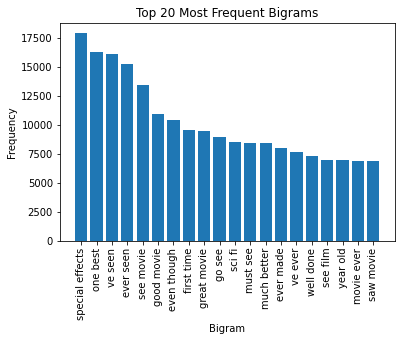

In [0]:
def extract_bigrams(text):
    tokens = text.split()
    bigrams = list(zip(tokens, tokens[1:]))
    bigram_strings = [' '.join(bigram) for bigram in bigrams]
    return bigram_strings

extract_bigrams_udf = udf(extract_bigrams, ArrayType(StringType()))

# Extract bigrams from preprocessed text using the defined UDF
bigram_df = final_df.withColumn('bigrams', extract_bigrams_udf('review'))

# Compute the frequency of each bigram in the dataset
all_bigrams = bigram_df.select('bigrams').rdd.flatMap(lambda x: x).flatMap(lambda x: x).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
bigram_freq = dict(all_bigrams.collect())

# Plot a histogram of the top N most frequent bigrams
N = 20
top_bigrams = Counter(bigram_freq).most_common(N)
top_bigram_counts = [count for bigram, count in top_bigrams]
top_bigram_labels = [bigram for bigram, count in top_bigrams]
plt.bar(top_bigram_labels, top_bigram_counts)
plt.xticks(rotation=90)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Bigrams'.format(N))
plt.show()

In [0]:
from pyspark.sql.functions import col, size, split, regexp_extract, sum

# Distribution of Labels
label_counts = final_df.groupBy('sentiment').count().orderBy('sentiment')
print('Distribution of Labels:\n')
label_counts.show()

# Review Length Stats
review_lengths = final_df.select(size(split(col('review'), ' ')).alias('review_length'))
print('Review Length Stats:\n')
review_lengths.describe().show()

# Number of Unique Words
unique_words = final_df.select(split(col('review'), ' ').alias('review_words')) \
                .rdd.flatMap(lambda row: row.review_words) \
                .distinct() \
                .count()
print('Number of Unique Words:', unique_words)

# Number of Special Characters
special_chars_count = final_df.select(regexp_extract(col('review'), '[^A-Za-z0-9\s]+', 0).alias('special_chars')) \
                       .agg(sum('special_chars')) \
                       .collect()[0][0]
print('Number of Special Characters:', special_chars_count)

# Number of HTML Tags
html_tags_count = final_df.select(regexp_extract(col('review'), '<.*?>', 0).alias('html_tags')) \
                    .agg(sum('html_tags')) \
                    .collect()[0][0]
print('Number of HTML Tags:', html_tags_count)


Distribution of Labels:

+---------+------+
|sentiment| count|
+---------+------+
|      0.0| 49727|
|      1.0| 49272|
|      2.0|204684|
+---------+------+

Review Length Stats:

+-------+-----------------+
|summary|    review_length|
+-------+-----------------+
|  count|           303683|
|   mean|94.37332020560913|
| stddev|82.89734694775092|
|    min|                2|
|    max|             1904|
+-------+-----------------+

Number of Unique Words: 230567
Number of Special Characters: None
Number of HTML Tags: None


In [0]:
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Split the data into training and test sets
(train_df, test_df) = final_df.randomSplit([0.8, 0.2], seed=42)

# Define the feature extraction pipeline
hashing_tf = HashingTF(inputCol='filtered_tokens', outputCol='raw_features')
idf = IDF(inputCol='raw_features', outputCol='features')
lr = LogisticRegression(featuresCol='features', labelCol='sentiment')

pipeline = Pipeline(stages=[hashing_tf, idf, lr])

# Train the model
lr_model = pipeline.fit(train_df)




In [0]:
# Make predictions on the test set
predictions = lr_model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='sentiment', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.6371746845425867


In [0]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(labelCol='sentiment', featuresCol='features')
pipeline = Pipeline(stages=[hashing_tf, idf, nb])

# Train the model
nb_model = pipeline.fit(train_df)

In [0]:
# Make predictions on the test set
predictions = nb_model.transform(test_df)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='sentiment', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.6801393270241851


In [0]:
from pyspark.ml.feature import HashingTF, IDF, StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
assembler = VectorAssembler(inputCols=['features'], outputCol='input_features')
indexer = StringIndexer(inputCol='sentiment', outputCol='label', handleInvalid='skip')

rf = RandomForestClassifier(labelCol='label', featuresCol='input_features', numTrees=15, seed=42)

evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')


rf_pipeline = Pipeline(stages=[hashing_tf, idf, assembler, indexer, rf])

rf_model = rf_pipeline.fit(train_df)